## EDA tabela_tratada_real

In [49]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [23]:
try:
    import google.colab
    IN_COLAB = True      
except:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    endereco_drive = '/content/drive/MyDrive/'
    arquivo = endereco_drive + 'dados/1_dados_entrada/tabela_tratada_real.xlsx'
else:
    arquivo = os.path.join('../dados/1_dados_entrada/tabela_tratada_real.xlsx')

    df = pd.ExcelFile(arquivo)
    itens_df = pd.read_excel(df,sheet_name='Itens') #Dataset de itens
    cons_df = pd.read_excel(df,sheet_name='Consumos') #Dataset de consumos
    ords_df = pd.read_excel(df,sheet_name='Pedidos') #Dataset de pedidos
    movs_df = pd.read_excel(df,sheet_name='Movimentações') #Dataset de movimentações

# 1. Itens

In [24]:
itens_df

,material,reorder_point,max_inventory,unit_price,inventory,lead_time,item_id,min_service_level
0,322,19.0,19.00,31.13,19.5,58.909091,2100322,0.85
1,395,237.0,332.36,11.63,196.0,36.818182,2100395,0.85
2,2598,1.0,25.00,2.21,30.0,14.000000,21002598,0.85
3,2865,1.0,20.00,3.80,21.0,34.000000,21002865,0.85
4,2883,1.0,2.00,11.44,21.0,76.000000,21002883,0.85
...,...,...,...,...,...,...,...,...
248,25378116,40.0,51.00,32.47,57.0,108.000000,210025378116,0.85
249,27086253,6.0,12.00,231.60,15.0,42.250000,210027086253,0.85
250,27094520,40.0,40.00,443.01,27.0,31.705882,210027094520,0.85
251,27106393,9000.0,9000.00,0.73,12000.0,36.000000,210027106393,0.85


In [25]:
itens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   material           253 non-null    int64  
 1   reorder_point      253 non-null    float64
 2   max_inventory      253 non-null    float64
 3   unit_price         253 non-null    float64
 4   inventory          253 non-null    float64
 5   lead_time          253 non-null    float64
 6   item_id            253 non-null    int64  
 7   min_service_level  253 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 15.9 KB


Principais variáveis de interesse para o problema: **lead_time, reorder_point e max_inventory**

## 1.1 Lead Time

Text(0.5, 0, 'lead_time')

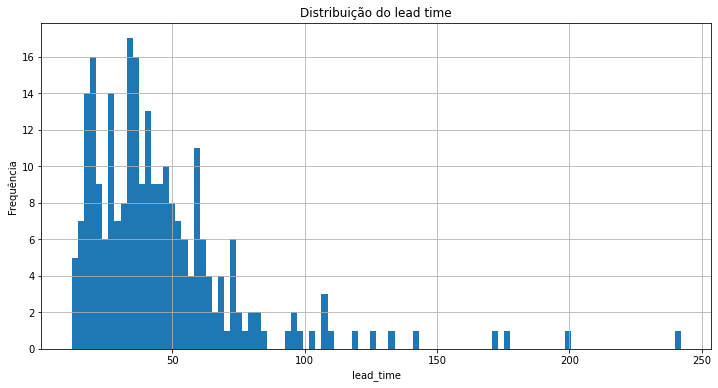

In [26]:
#Distribuição do lead time
plt.figure(figsize=(12,6))
itens_df.lead_time.hist(bins=100)
plt.title('Distribuição do lead time')
plt.ylabel('Frequência')
plt.xlabel('lead_time')

## 1.2 Diferença entre ponto de pedido e estoque máximo

Text(0.5, 0, 'Diferença entre ponto de pedido e estoque máximo')

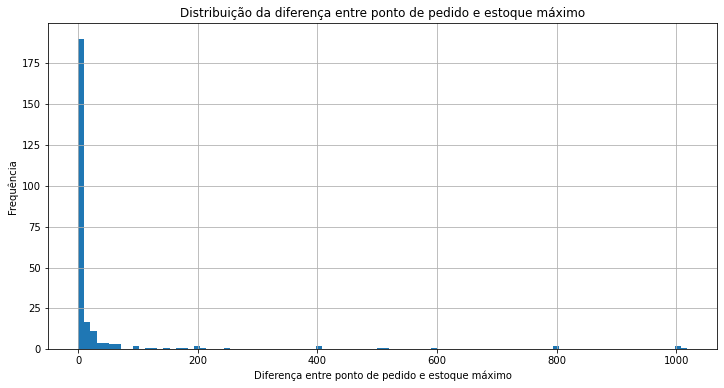

In [27]:
#Distribuição da diferença entre ponto de pedido e estoque máximo
plt.figure(figsize=(12,6))
(itens_df.max_inventory - itens_df.reorder_point).hist(bins=100)
plt.title('Distribuição da diferença entre ponto de pedido e estoque máximo')
plt.ylabel('Frequência')
plt.xlabel('Diferença entre ponto de pedido e estoque máximo')

Text(0.5, 0, '% do estoque máximo que é o ponto de pedido')

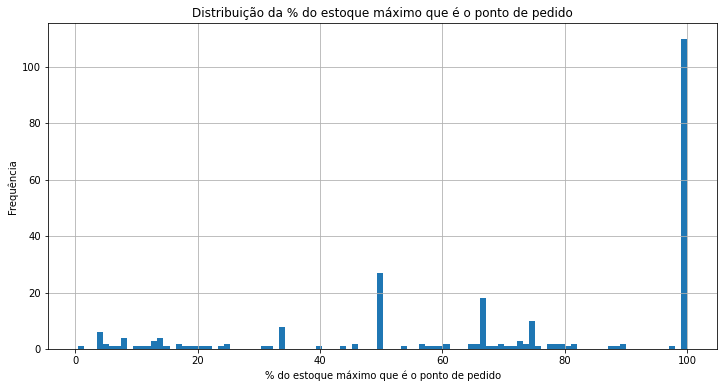

In [47]:
#Relação entre ponto de pedido e estoque máximo
plt.figure(figsize=(12,6))
(100*itens_df.reorder_point/itens_df.max_inventory).hist(bins=100)
plt.title('Distribuição da % do estoque máximo que é o ponto de pedido')
plt.ylabel('Frequência')
plt.xlabel('% do estoque máximo que é o ponto de pedido')

**Percepção:** tratar o problema definindo ponto de pedido e de estoque máximo com essa base deve ser pouco efetivo, já que a maioria dos itens possui ambos os valores iguais.

# 2. Consumos

In [29]:
cons_df

,date,item_id,quantity
0,2017-06-01,2100101972,1.0
1,2017-06-01,2100102819,1.0
2,2017-06-01,210025163330,6.0
3,2017-06-01,2100390473,3.0
4,2017-06-01,21009007913,1.0
...,...,...,...
5531,2021-06-18,2100451852,1.0
5532,2021-06-18,2100458631,30.0
5533,2021-06-19,210025378098,1.0
5534,2021-06-19,210027094520,6.0


In [30]:
cons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5536 entries, 0 to 5535
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5536 non-null   datetime64[ns]
 1   item_id   5536 non-null   int64         
 2   quantity  5536 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 129.9 KB


## 2.1 Intervalo de datas

In [31]:
#Data mínima e máxima do dataset
cons_df.date.min(), cons_df.date.max()

(Timestamp('2017-06-01 00:00:00'), Timestamp('2021-06-19 00:00:00'))

Text(0.5, 0, 'Data')

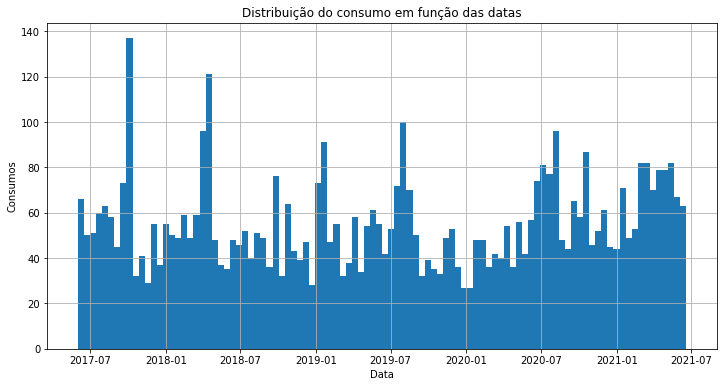

In [32]:
#Distribuição dos consumos ao longo das datas
plt.figure(figsize=(12,6))
cons_df.date.hist(bins=100)
plt.title('Distribuição do consumo em função das datas')
plt.ylabel('Consumos')
plt.xlabel('Data')

Text(0.5, 0, 'Quantidade consumida')

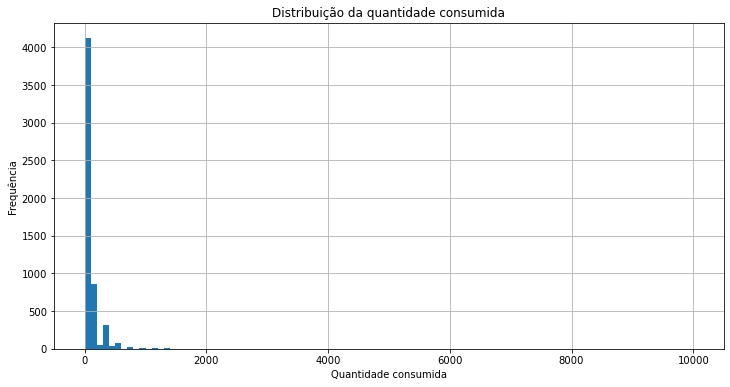

In [33]:
#Distribuição da quantidade consumida
plt.figure(figsize=(12,6))
cons_df.quantity.hist(bins=100)
plt.title('Distribuição da quantidade consumida')
plt.ylabel('Frequência')
plt.xlabel('Quantidade consumida')

# 3 Pedidos 

In [37]:
ords_df

,order_date,arrival_date,material,quantity,item_id
0,2017-10-10,2017-11-14,322,9.72,2100322
1,2017-12-01,2018-01-10,322,9.72,2100322
2,2018-04-19,2018-05-16,322,19.44,2100322
3,2019-05-23,2019-06-12,322,9.72,2100322
4,2019-07-24,2019-07-29,322,84.00,2100322
...,...,...,...,...,...
1711,2021-02-03,2021-03-22,27116747,100.00,210027116747
1712,2021-02-10,2021-03-22,27116747,100.00,210027116747
1713,2021-05-12,2021-06-20,27116747,237.00,210027116747
1714,2021-05-12,2021-06-20,27116747,202.00,210027116747


Verificar os valores de quantity. Eles estão como float, e tem valores de fato não inteiros

In [40]:
ords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    1716 non-null   datetime64[ns]
 1   arrival_date  1716 non-null   datetime64[ns]
 2   material      1716 non-null   int64         
 3   quantity      1716 non-null   float64       
 4   item_id       1716 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 67.2 KB


Distribuição das datas de envio e de recebimento

In [42]:
ords_df.order_date.min(), ords_df.order_date.max()

(Timestamp('2017-06-01 00:00:00'), Timestamp('2021-06-02 00:00:00'))

In [43]:
ords_df.arrival_date.min(), ords_df.arrival_date.max()

(Timestamp('2017-06-19 00:00:00'), Timestamp('2021-06-20 00:00:00'))

In [50]:
vendas_ano = ords_df.groupby(by=['order_date']).count()

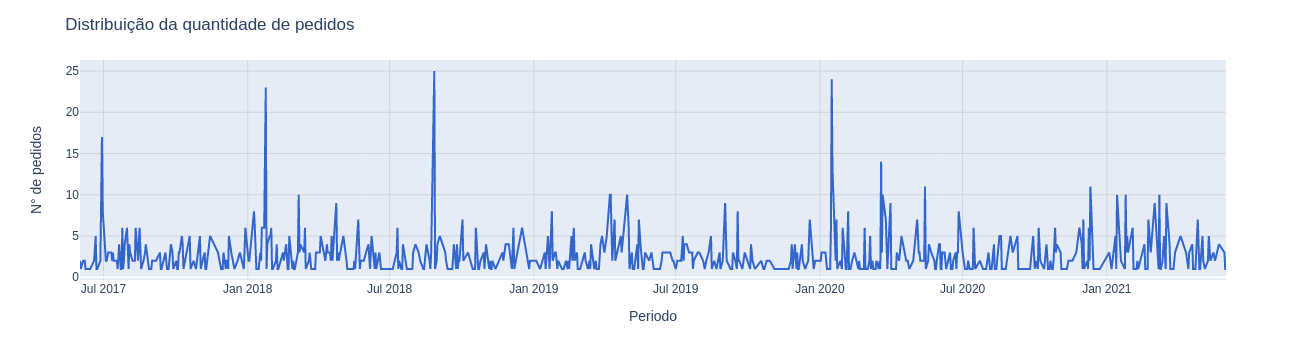

In [60]:
fig = px.line(vendas_ano, x=vendas_ano.index, y=vendas_ano.quantity,color_discrete_sequence=px.colors.qualitative.G10)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_layout(
                  title='Distribuição da quantidade de pedidos ',
                  yaxis=dict(title_text="N° de pedidos"),
    xaxis=dict(title_text="Periodo"))
fig.show()

# 4 Movimentações